In [50]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
path = os.getcwd()
csv_files = glob.glob("*.csv", root_dir=path + "/raymond")
# csv_files = glob.glob("/raymond/*.csv")
data = {}

for file in csv_files:
    df = pd.read_csv(os.path.join(path + "/raymond/" + file))
    
    data[file] = df

In [38]:
areas = []
for key in data.keys(): 
    if "no barrier" not in key and "Cs-137" in key and "barrier" not in key:
        exp_data = data[key][" - Ch0"]
        index = exp_data.idxmax()
        areas.append(np.trapz(exp_data[index-30:index+30]))
        # plt.figure()
        # plt.plot(exp_data)
        # plt.vlines([index - 30, index + 30], 0, 1500, colors="orange")
mean_area = np.mean(areas)
print(mean_area)
i_meas = mean_area/(0.62 * 150)
print(f"measured intensity: {i_meas}, absolute intensity: {i_meas/0.0025}")
# plt.plot(exp_data)
# plt.plot(areas)
# plt.vlines(index-30, 0, 300, colors="orange")
# plt.vlines(index+30, 0, 300, colors="orange")
# plt.show()

35519.666666666664
measured intensity: 381.93189964157705, absolute intensity: 152772.75985663082


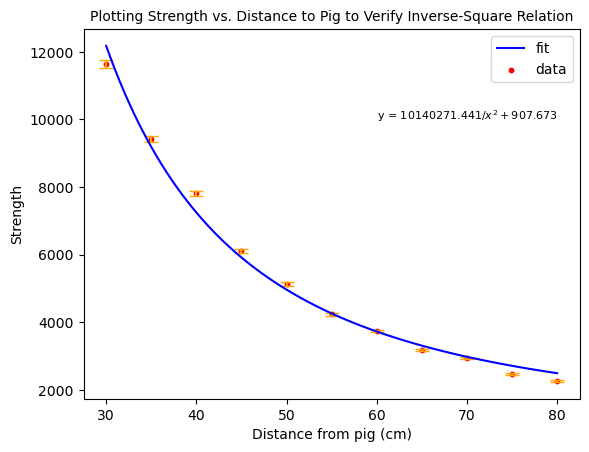

In [48]:
pos = np.array([30,35,40,45,50,55,60,65,70,75,80])
strength = np.array([11639,9420,7818,6109,5134,4236,3745,3177,2946,2476,2256])

def f(x, a, b): 
    return (a/(x**2))+ b

var, cov = opt.curve_fit(f, pos, strength)
a_fit, b_fit = var
a_round = str(np.round(a_fit, decimals=3))
b_round = str(np.round(b_fit, decimals=3))

errs = 0.01 * strength
plt.errorbar(pos, strength, yerr=0.01*strength, c = "orange", capsize = 5, fmt = "None", markersize = '10')
# plt.scatter(pos, strength, s = 6, c = "orange")
x_vals = np.linspace(pos[0], pos[-1], 100)
plt.plot(x_vals, f(x_vals, a_fit, b_fit), c = "blue")
plt.scatter(pos, strength, s = 10, c = "red")
plt.xlabel("Distance from pig (cm)")
plt.ylabel("Strength")
plt.title("Plotting Strength vs. Distance to Pig to Verify Inverse-Square Relation", fontsize = 10)
plt.legend(["fit", "data"])
plt.text(60, 10000, f"y = ${a_round}/x^2 + {b_round}$", fontsize=8)
plt.show()


markdown 

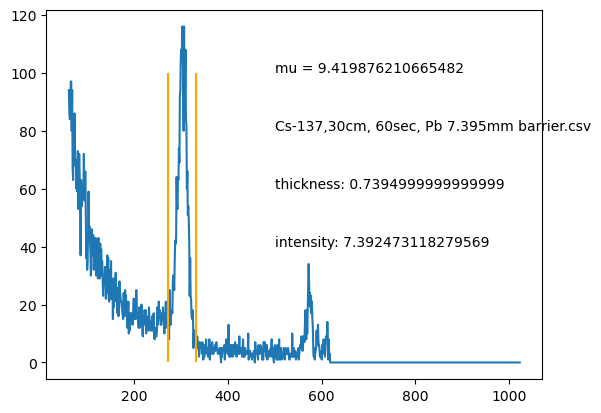

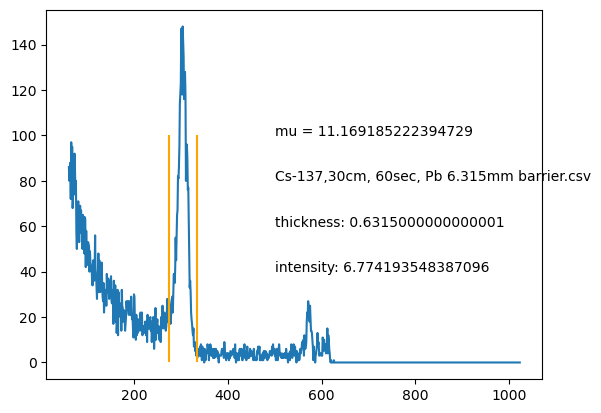

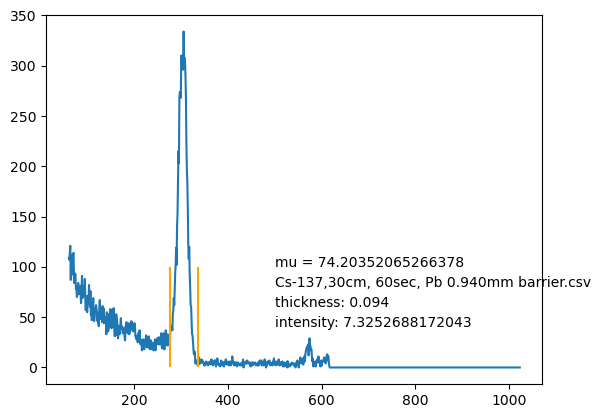

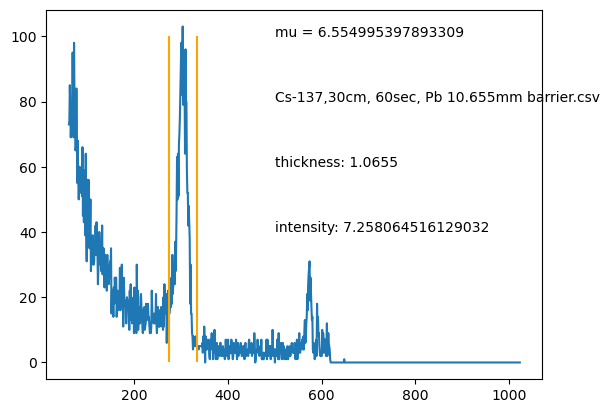

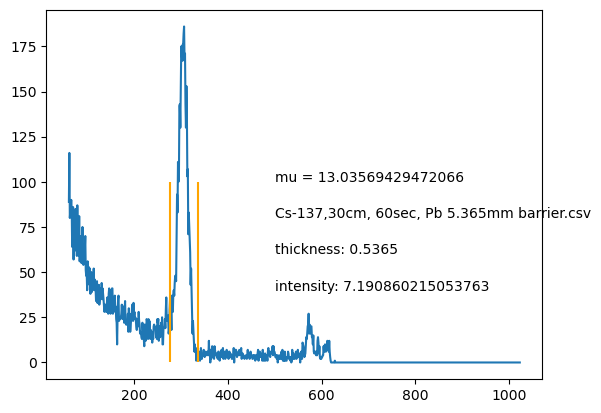

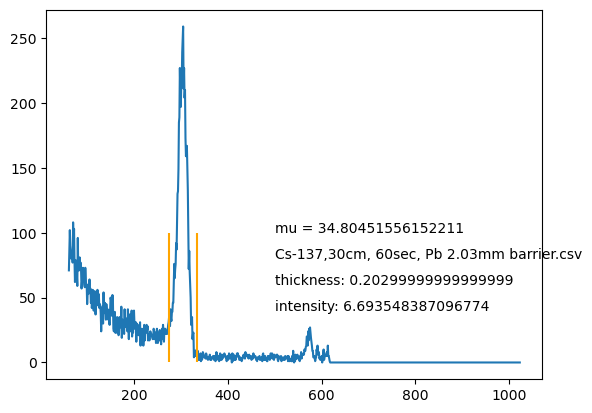

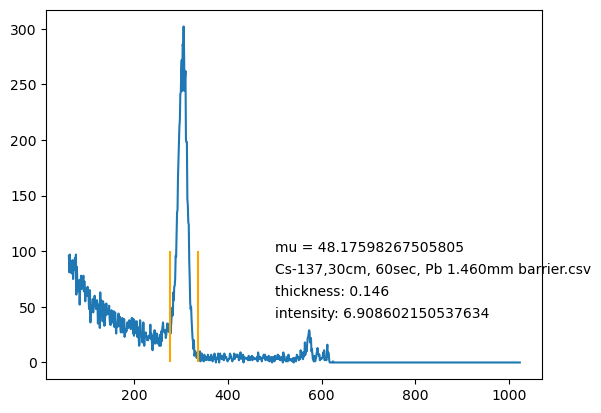

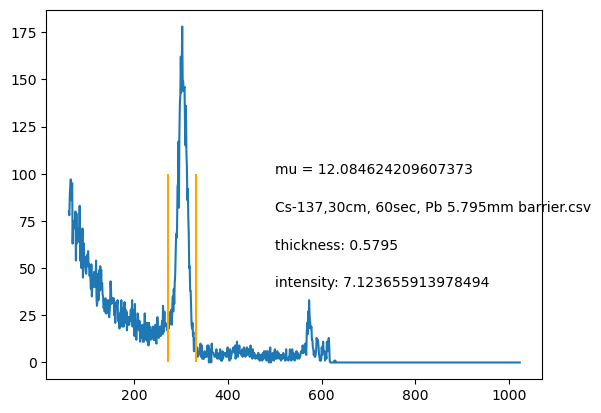

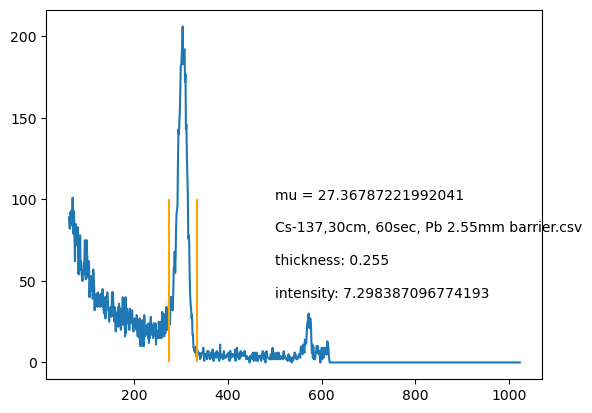

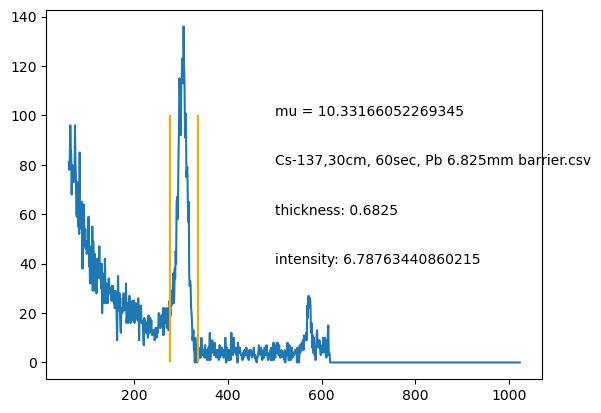

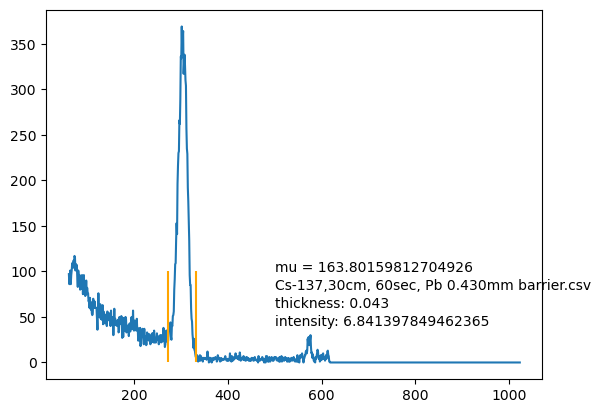

In [159]:
reference = data["Cs-137,30cm, 60sec, no barrier.csv"][" - Ch0"]
index = reference.idxmax()
photopeak = np.trapz(reference[index-30:index+30])
I0 = photopeak/(0.62 * 60)
# I_abs = I_mes / 0.0025

# # print(I_mes, I_abs)
# plt.plot(reference)
# plt.vlines([index - 30, index + 30], 0, 12000, colors="orange")
# mus = []
intensities = []
thicknesses = []
for key in data.keys():
    if "Pb" in key and "Cs-137" in key:
        thickness = float(re.findall("(\d+.\d+)mm", key)[0])/10
        exp_data = data[key][" - Ch0"]
        exp_data = exp_data[50:]
        index = exp_data.idxmax()
        intensity = np.trapz(exp_data[index-30:index+30])
        intensity = intensity/(0.62 * 60)
        plt.figure()
        plt.plot(exp_data)
        plt.vlines([index-30, index+30], 0, 100, color="orange")
        plt.text(500, 100, f"mu = {-np.log(intensity/I0)/thickness}")
        plt.text(500, 80, key)
        plt.text(500, 60, "thickness: " + str(thickness))
        plt.text(500, 40, "intensity: " + str(intensity))
        # mus.append(-np.log(intensity/I0)/thickness)
#         intensities.append(intensity)
#         thicknesses.append(thickness)
        
# def f(x, a, b):
#     return a * x + b

# intensities = np.array(intensities)
# y_vals = -np.log(intensities/I0)
# var, cov = opt.curve_fit(f, thicknesses, y_vals)
# mu_opt, b_opt = var
# print(mu_opt/11)
# # print(mu_opt)
# plt.scatter(thicknesses, y_vals)
# print(intensities)
# print(thicknesses)
# print(thicknesses)
# print(I0)
# print(mus)
# print(np.mean(mus)/11.35)